# Image Classifier

### 1. Setup and Load Data

#### 1.1 Install Dependencies and Setup

In [1]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

You should consider upgrading via the 'C:\Users\Aryan Sinha\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


In [2]:
!pip list

Package                        Version
------------------------------ -------------------
absl-py                        1.2.0
albumentations                 1.2.1
altair                         4.2.0
anyio                          3.6.1
appdirs                        1.4.4
argon2-cffi                    20.1.0
asgiref                        3.5.2
astor                          0.8.1
astunparse                     1.6.3
async-generator                1.10
attrs                          20.3.0
audioread                      2.1.9
backcall                       0.2.0
base58                         2.1.1
beautifulsoup4                 4.9.3
bleach                         3.2.1
blinker                        1.4
blis                           0.7.5
bs4                            0.0.1
cachetools                     4.2.2
caer                           2.0.8
catalogue                      2.0.6
certifi                        2020.12.5
cffi                           1.14.4
chardet           

You should consider upgrading via the 'C:\Users\Aryan Sinha\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.



fastparquet                    0.7.2
fastprogress                   1.0.0
filelock                       3.0.12
Flask                          1.1.2
Flask-SQLAlchemy               2.5.1
flatbuffers                    1.12
fsspec                         2021.11.1
future                         0.18.2
gast                           0.4.0
gitdb                          4.0.9
GitPython                      3.1.26
google-auth                    1.34.0
google-auth-oauthlib           0.4.4
google-pasta                   0.2.0
googleapis-common-protos       1.56.4
graphviz                       0.19.1
greenlet                       1.1.0
grep                           0.3.2
grpcio                         1.34.1
h11                            0.14.0
h5py                           3.1.0
html5lib                       1.1
htmlmin                        0.1.12
idna                           2.10
ImageHash                      4.2.1
imageio                        2.9.0
imgviz                      

In [1]:
import tensorflow as tf
import os

In [2]:
# Run only if your device has a GPU to avoid OOM errors by setting up GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True) ## limiting the memory growth

#### 1.2 Removing Dodgy Images

In [7]:
import cv2
import imghdr
import matplotlib.pyplot as plt

In [4]:
data_dir = 'data'

In [5]:
image_exts = ['jpeg','jpg','bmp','png']

In [6]:
os.listdir(os.path.join(data_dir,'happy'))

['05-12-21-happy-people.jpg',
 '1000_F_42220133_toAU6USGY9jVr2XJFLssfG00cSYIJ173.jpg',
 '110754-utyeqqosky-1547658396.jpeg',
 '154006829.jpg',
 '170404-happy-workers-feature.jpg',
 '1HEoLBLidT2u4mhJ0oiDgig.png',
 '2F843f1ad6-ccd8-4fc0-a6e0-a80c94e680e12F196bff35_9a51_4202_9454_7745bc1eb863.jpg',
 '35438_hd.jpg',
 '56f455011e0000b300705475.jpeg',
 '7-Habits-of-Happy-People-image.jpeg',
 '71hBPTAhIXL.jpg',
 '960x0.jpg',
 '988689_Wallpaper2.jpg',
 'A_Sep20_14_1189155141.jpg',
 'banner-with-diverse-happy-people-group-standing-together-white_90220-141.jpg',
 'compassion-900x387.jpg',
 'Dollarphotoclub_76084977-1.jpg',
 'e162ccda8ce0f197f8863f327add9233.jpg',
 'football-fans-taking-selfie-during-260nw-1933090130.jpg',
 'friends-happy-190821.jpg',
 'friends_190412.jpg',
 'fun-1012681_1280.jpg',
 'GettyImages-565706549-949x534.jpg',
 'GettyImages-871518740.jpg',
 'getty_143919450_9706479704500104_51510.jpg',
 'getty_152414899_97046097045006_68075.jpg',
 'getty_478389113_970647970450091_99776.j

In [8]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir,image_class)):
        image_path = os.path.join(data_dir,image_class,image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
#             os.remove(image_path)

Image not in ext list data\happy\2F843f1ad6-ccd8-4fc0-a6e0-a80c94e680e12F196bff35_9a51_4202_9454_7745bc1eb863.jpg
Image not in ext list data\happy\56f455011e0000b300705475.jpeg
Image not in ext list data\happy\football-fans-taking-selfie-during-260nw-1933090130.jpg
Image not in ext list data\happy\guilherme-stecanella-375176-unsplash.jpg
Image not in ext list data\happy\Happy20People.jpg
Image not in ext list data\happy\portrait-young-father-carrying-his-260nw-736997836.jpg
Image not in ext list data\happy\sjnv_cnh7ugnaddm7so6sq.jpg
Image not in ext list data\sad\50740738-sad-people-s-portraits.jpg
Image not in ext list data\sad\5cd731f92100002f007a7304.jpeg
Image not in ext list data\sad\adult-man-table-touches-his-260nw-1677788686.jpg
Image not in ext list data\sad\african-american-depressive-sad-broken-260nw-475790911.jpg
Image not in ext list data\sad\cry-360x240.gif
Image not in ext list data\sad\depressed-man-studio-shot-260nw-404652526.jpg


#### 1.3 Load Data

In [10]:
tf.data.Dataset??

In [11]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 124 files belonging to 2 classes.


In [13]:
tf.keras.utils.image_dataset_from_directory??

In [14]:
data

<BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [15]:
data_iterator = data.as_numpy_iterator()

In [25]:
batch = data_iterator.next()

In [26]:
batch

(array([[[[ 42.       ,  41.       ,  46.       ],
          [ 42.       ,  41.       ,  46.       ],
          [ 42.       ,  41.       ,  46.       ],
          ...,
          [ 54.       ,  54.       ,  54.       ],
          [ 54.       ,  54.       ,  54.       ],
          [ 54.       ,  54.       ,  54.       ]],
 
         [[ 42.       ,  41.       ,  46.       ],
          [ 42.       ,  41.       ,  46.       ],
          [ 42.       ,  41.       ,  46.       ],
          ...,
          [ 54.       ,  54.       ,  54.       ],
          [ 54.       ,  54.       ,  54.       ],
          [ 54.       ,  54.       ,  54.       ]],
 
         [[ 42.       ,  41.       ,  46.       ],
          [ 42.       ,  41.       ,  46.       ],
          [ 42.       ,  41.       ,  46.       ],
          ...,
          [ 54.       ,  54.       ,  54.       ],
          [ 54.       ,  54.       ,  54.       ],
          [ 54.       ,  54.       ,  54.       ]],
 
         ...,
 
         [[1

In [27]:
len(batch)

2

In [28]:
batch[0].shape

(32, 256, 256, 3)

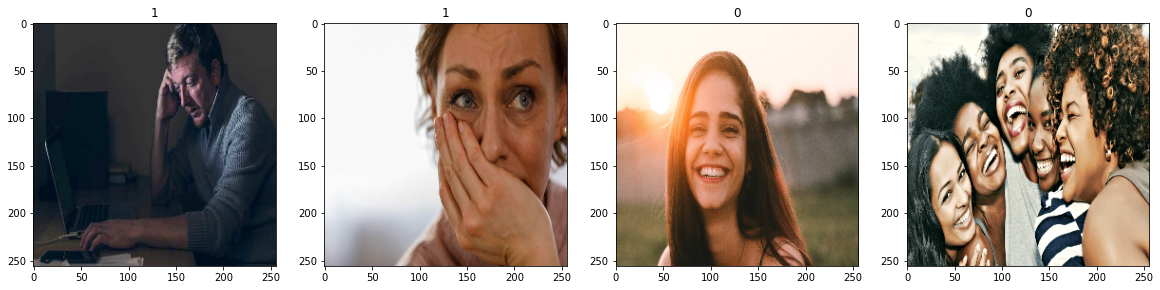

In [29]:
fig,ax = plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [31]:
# class 1 : Sad
# class 0 : Happy

### Preprocessing the Data

#### 2.1 Scale Data

In [32]:
data = data.map(lambda x,y : (x/255,y))


In [33]:
data.as_numpy_iterator().next()

(array([[[[0.70204985, 0.6157753 , 0.4554812 ],
          [0.64114344, 0.5470258 , 0.39800617],
          [0.66004807, 0.5583324 , 0.40269512],
          ...,
          [0.4005663 , 0.62696797, 0.8564027 ],
          [0.3496003 , 0.5664781 , 0.73398197],
          [0.5577484 , 0.6943781 , 0.84706503]],
 
         [[0.6979703 , 0.61169577, 0.4584243 ],
          [0.64639246, 0.5522748 , 0.4032552 ],
          [0.6589475 , 0.55723184, 0.40159458],
          ...,
          [0.41491842, 0.61831915, 0.85698146],
          [0.37039483, 0.57246   , 0.7584181 ],
          [0.5130888 , 0.6437701 , 0.819525  ]],
 
         [[0.67133933, 0.5850648 , 0.43212363],
          [0.66610086, 0.57198316, 0.4229636 ],
          [0.6685925 , 0.5668768 , 0.41123956],
          ...,
          [0.39091748, 0.5701148 , 0.80052227],
          [0.34329188, 0.52371466, 0.70762867],
          [0.49461263, 0.6106895 , 0.7671382 ]],
 
         ...,
 
         [[0.672369  , 0.57825136, 0.4370749 ],
          [0.65686

#### 2.2 Split Data

In [34]:
len(data)

4

In [39]:
train_size = int(len(data)*0.7)
val_size = int(len(data)*0.2)+1
test_size = int(len(data)*0.1)+1

In [40]:
train_size

2

In [41]:
val_size

1

In [42]:
test_size

1

In [43]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [44]:
len(train)

2

In [45]:
len(val),len(test)

(1, 1)

In [47]:
train.as_numpy_iterator().next()

(array([[[[1.09803922e-01, 1.64705887e-01, 2.07843140e-01],
          [1.09803922e-01, 1.64705887e-01, 2.07843140e-01],
          [1.09803922e-01, 1.64705887e-01, 2.07843140e-01],
          ...,
          [1.13725491e-01, 1.84313729e-01, 2.31372550e-01],
          [1.13725491e-01, 1.84313729e-01, 2.31372550e-01],
          [1.13725491e-01, 1.84313729e-01, 2.31372550e-01]],
 
         [[1.09803922e-01, 1.64705887e-01, 2.07843140e-01],
          [1.09803922e-01, 1.64705887e-01, 2.07843140e-01],
          [1.11596830e-01, 1.66498795e-01, 2.09636047e-01],
          ...,
          [1.13725491e-01, 1.84313729e-01, 2.31372550e-01],
          [1.13725491e-01, 1.84313729e-01, 2.31372550e-01],
          [1.13725491e-01, 1.84313729e-01, 2.31372550e-01]],
 
         [[1.13059133e-01, 1.67961091e-01, 2.11098343e-01],
          [1.13059133e-01, 1.67961091e-01, 2.11098343e-01],
          [1.13670826e-01, 1.68572783e-01, 2.11710051e-01],
          ...,
          [1.16713673e-01, 1.87301904e-01, 2.3436

### 3. Building Deep Neural Network

#### 3.1 Creating the NN

In [48]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout

In [49]:
model = Sequential()

In [50]:
model.add(Conv2D(16,(3,3),1,activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [51]:
model.compile('adam',loss=tf.losses.BinaryFocalCrossentropy(),metrics=['accuracy'])

In [52]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

#### 3.2 Training the model

In [53]:
logdir = 'logs'

In [54]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [55]:
hist = model.fit(train,epochs=20,validation_data=val,callbacks=[tensorboard_callback])

Epoch 1/20
2/2 [==============================] - 8s 4s/step - loss: 0.4012 - accuracy: 0.6562 - val_loss: 0.3210 - val_accuracy: 0.3438
Epoch 2/20
2/2 [==============================] - 6s 3s/step - loss: 0.2495 - accuracy: 0.5000 - val_loss: 0.1573 - val_accuracy: 0.5625
Epoch 3/20
2/2 [==============================] - 6s 3s/step - loss: 0.1333 - accuracy: 0.7031 - val_loss: 0.1585 - val_accuracy: 0.6250
Epoch 4/20
2/2 [==============================] - 6s 3s/step - loss: 0.1467 - accuracy: 0.6719 - val_loss: 0.1151 - val_accuracy: 0.6562
Epoch 5/20
2/2 [==============================] - 6s 3s/step - loss: 0.1158 - accuracy: 0.7344 - val_loss: 0.1145 - val_accuracy: 0.8438
Epoch 6/20
2/2 [==============================] - 6s 3s/step - loss: 0.1336 - accuracy: 0.7656 - val_loss: 0.1186 - val_accuracy: 0.8750
Epoch 7/20
2/2 [==============================] - 6s 3s/step - loss: 0.1023 - accuracy: 0.8125 - val_loss: 0.1029 - val_accuracy: 0.7812
Epoch 8/20
2/2 [=========================

In [56]:
hist.history

{'loss': [0.4012083113193512,
  0.24950957298278809,
  0.13330161571502686,
  0.14666229486465454,
  0.11581216007471085,
  0.1336365044116974,
  0.10232822597026825,
  0.09696050733327866,
  0.09759729355573654,
  0.09036820381879807,
  0.07345642149448395,
  0.053766973316669464,
  0.056098293513059616,
  0.04504009336233139,
  0.0216938778758049,
  0.023814206942915916,
  0.0172499418258667,
  0.010388359427452087,
  0.005898458883166313,
  0.004996764473617077],
 'accuracy': [0.65625,
  0.5,
  0.703125,
  0.671875,
  0.734375,
  0.765625,
  0.8125,
  0.765625,
  0.78125,
  0.921875,
  0.90625,
  0.984375,
  0.921875,
  0.921875,
  0.984375,
  0.984375,
  0.984375,
  0.984375,
  1.0,
  1.0],
 'val_loss': [0.3209848403930664,
  0.15727025270462036,
  0.1584557294845581,
  0.11507559567689896,
  0.1144898310303688,
  0.11861732602119446,
  0.10291095823049545,
  0.08627238869667053,
  0.08677482604980469,
  0.0694350153207779,
  0.05336955934762955,
  0.057386383414268494,
  0.0269332

#### 3.3 Plot Performance

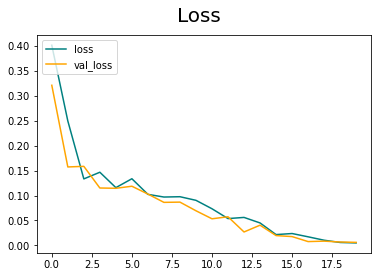

In [57]:
fig = plt.figure()
plt.plot(hist.history['loss'],color='teal',label='loss')
plt.plot(hist.history['val_loss'],color='orange',label = 'val_loss')
fig.suptitle('Loss',fontsize=20)
plt.legend(loc='upper left')
plt.show()

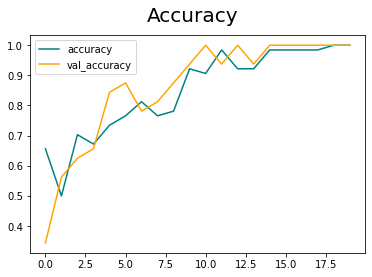

In [59]:
fig = plt.figure()
plt.plot(hist.history['accuracy'],color='teal',label='accuracy')
plt.plot(hist.history['val_accuracy'],color='orange',label = 'val_accuracy')
fig.suptitle('Accuracy',fontsize=20)
plt.legend(loc='upper left')
plt.show()

### 4. Evaluating the Performance


In [60]:
from tensorflow.keras.metrics import Precision,Recall,BinaryAccuracy

In [61]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [62]:
len(test)

1

In [63]:
for batch in test.as_numpy_iterator():
    X,y = batch
    yhat = model.predict(X)
    pre.update_state(y,yhat)
    re.update_state(y,yhat)    
    acc.update_state(y,yhat)    

1/1 [==============================] - 0s 385ms/step


In [64]:
print(pre.result(),re.result(),acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


#### 4.2 Testing

In [83]:
import cv2

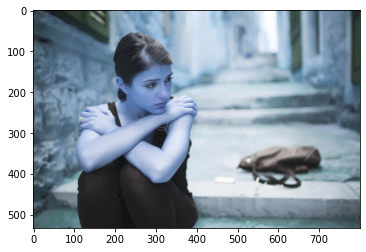

In [89]:
img = cv2.imread('sad_sample.jpg')
plt.imshow(img)
plt.show()

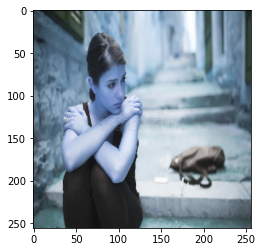

In [90]:
resize = tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [91]:
yhat = model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 31ms/step


In [92]:
yhat

array([[0.59909093]], dtype=float32)

In [93]:
if yhat>=0.50 :
    print("Sad Image")
else:
    print("Happy Image")

Sad Image


### Saving the Model

In [94]:
from tensorflow.keras.models import load_model

In [95]:
model.save(os.path.join('models','happysadmodel.h5'))

In [96]:
new_model = load_model(os.path.join('models','happysadmodel.h5'))

In [97]:
img = cv2.imread('sad_sample.jpg')
resize = tf.image.resize(img,(256,256))
yhat_new = new_model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 120ms/step


In [98]:
if yhat>=0.50 :
    print("Sad Image")
else:
    print("Happy Image")

Sad Image
